In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df1=df.drop(['who','adult_male','deck','deck','embark_town','alive','alone','class'],axis=1)
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
df2=df1.dropna()
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [6]:
from keras.utils import to_categorical

x=df2.drop(['survived'], axis = 1)
y=df2['survived']
x['sex']=x['sex'].replace(np.unique(x['sex']), range(len(np.unique(x['sex']))))
x['embarked']=x['embarked'].replace(np.unique(x['embarked']), range(len(np.unique(x['embarked']))))

In [7]:
x['sex']=x['sex'].astype(int)
x['embarked']=x['embarked'].astype(int)

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [9]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 712 entries, 0 to 890
Series name: survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [10]:
from sklearn.model_selection import train_test_split

x_data, tt_x, y_data, tt_y = train_test_split(x, y, test_size = 0.3, random_state=42)
tr_x, val_x, tr_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)
print(tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape)

(398, 7) (398,) (214, 7) (214,) (100, 7) (100,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

model.add(Dense(16, activation = 'relu',input_shape=tr_x.shape[1:]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics='acc')
hy = model.fit(tr_x,tr_y,validation_data=(val_x,val_y),epochs=500)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
13/13 [==============================] - 1s 21ms/step - loss: 1.7266 - acc: 0.6859 - val_loss: 0.9428 - val_acc: 0.6700
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 1.3939 - acc: 0.6834 - val_loss: 0.8337 - val_acc: 0.6700
Epoch 3/500
13/13 [========

In [12]:
model.evaluate(tt_x,tt_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.5664 - acc: 0.7944


[0.5663647055625916, 0.7943925261497498]

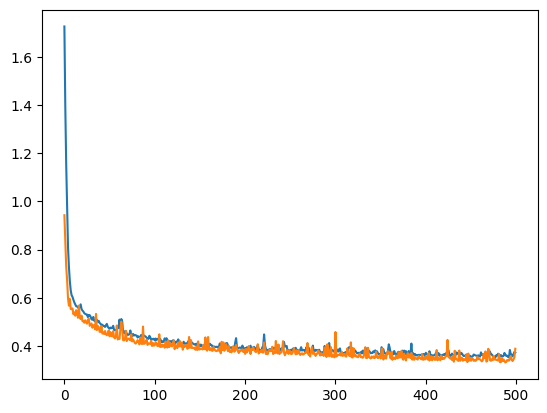

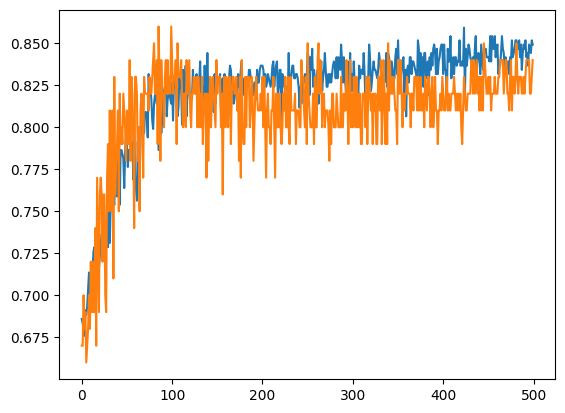

In [13]:
import matplotlib.pyplot as plt

plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()

plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()